### NAME : AARIZ ZAFAR

### Assignment : 4

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [171]:
from sklearn import set_config
set_config(display = "diagram")

In [172]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
pd.set_option("display.max_columns",None)

In [174]:
df = pd.read_csv("/content/drive/MyDrive/DS_Industrial/Data_pre_processing/employee_attribute.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [175]:
df.shape

(1470, 35)

In [176]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [178]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


extracting numeric feature

extracting catagorical feature

In [179]:
numeric_feature = df.select_dtypes(exclude='object').columns
catagorical_feature = df.select_dtypes(include='object').columns

PRINTING ALL THE UNIQUE VALUE IN THE CATAGORY LIST

In [180]:
uni_cat = []
no_cat = []
null_vals = []
for cat_feature in catagorical_feature:
  uni_cat.append(df[cat_feature].unique())
  no_cat.append(df[cat_feature].nunique())
  null_vals.append(df[cat_feature].isnull().sum())

df_info = pd.DataFrame({
                       "FEATURE NAME" : catagorical_feature,
                       "NO UNI CAT" : no_cat,
                       "NULL VALS" : null_vals,
                       "UNIQUE CAT": uni_cat,
                        })

In [181]:
df_info

,FEATURE NAME,NO UNI CAT,NULL VALS,UNIQUE CAT
0,Attrition,2,0,"[Yes, No]"
1,BusinessTravel,3,0,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
2,Department,3,0,"[Sales, Research & Development, Human Resources]"
3,EducationField,6,0,"[Life Sciences, Other, Medical, Marketing, Tec..."
4,Gender,2,0,"[Female, Male]"
5,JobRole,9,0,"[Sales Executive, Research Scientist, Laborato..."
6,MaritalStatus,3,0,"[Single, Married, Divorced]"
7,Over18,1,0,[Y]
8,OverTime,2,0,"[Yes, No]"


DROPPING COLUMNS THAT HAVE NO RELATION WITH THE DATA PROVIDED

In [182]:
df = df.drop(['EmployeeNumber',"EmployeeCount","Over18","Attrition","DistanceFromHome"],axis=1)

In [183]:
df.head()

,Age,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


PLOTTING A HISTOGRAM WITH RESPECT TO MONTHLY SALARY

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

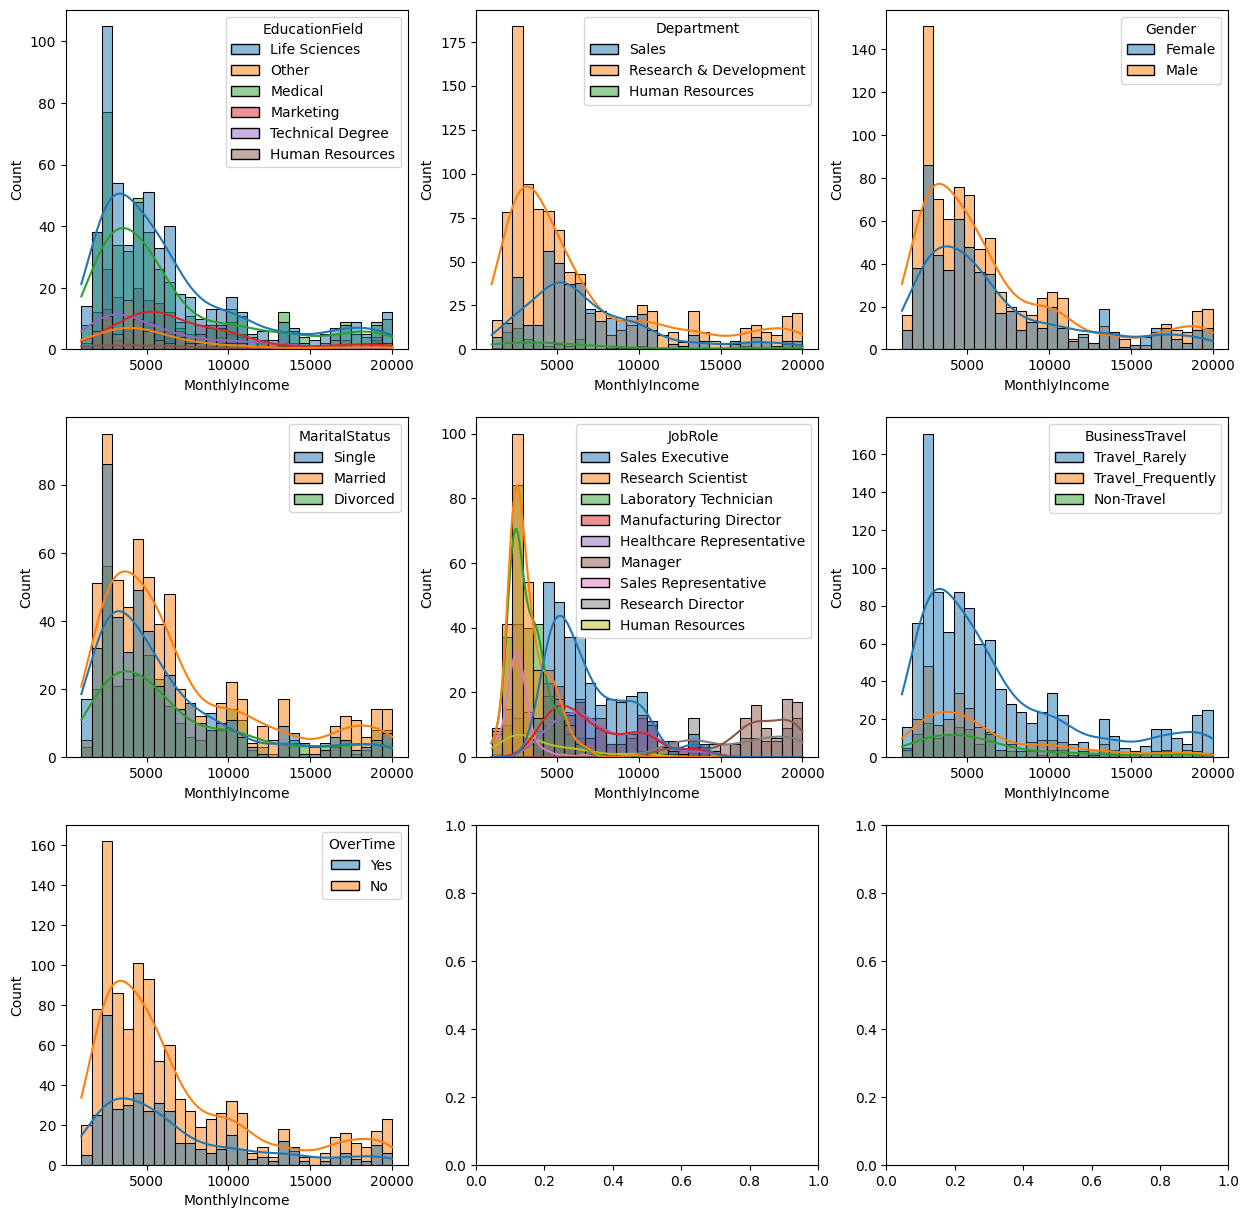

In [184]:
plt.subplots(3,3,figsize=(15,15))

plt.subplot(331)
sns.histplot(data = df,
             x    = "MonthlyIncome",
             bins = 30,
             kde  = True,
             hue  = "EducationField")

plt.subplot(332)
sns.histplot(data = df,
             x    = "MonthlyIncome",
             bins = 30,
             kde  = True,
             hue  = "Department")

plt.subplot(333)
sns.histplot(data = df,
             x    = "MonthlyIncome",
             bins = 30,
             kde  = True,
             hue  = "Gender")

plt.subplot(334)
sns.histplot(data = df,
             x    = "MonthlyIncome",
             bins = 30,
             kde  = True,
             hue  = "MaritalStatus")

plt.subplot(335)
sns.histplot(data = df,
             x    = 'MonthlyIncome',
             bins = 30,
             kde  = True,
             hue  = 'JobRole')

plt.subplot(336)
sns.histplot(data = df,
             x    = "MonthlyIncome",
             bins = 30,
             kde  = True,
             hue  = "BusinessTravel")

plt.subplot(337)
sns.histplot(data = df,
             x    = "MonthlyIncome",
             bins = 30,
             kde  = True,
             hue  = "OverTime")

INSIGHTS ->>>>>>

1) people who have there education field as 'life science' have hight income

2) people who have there education field as 'human resource" have least income

-------------------------------------------------------------------------

3) people in department "Research and Developmetn" have the high monthly income

4) people in department "Human Resourec" have the lest monthly income

-------------------------------------------------------------------------

5) Males have an upper hand in Monthly salary compared to

-------------------------------------------------------------------------

6) Employes who are married have a high monthly income

7) divorced once have the least monthly income.

-------------------------------------------------------------------------

8) Employes in the "Research Scientist" job role have a high monthly income

-------------------------------------------------------------------------

9) Employes who travel rarely have high monthly income

10) Employes who do not travel at all have the least monthly income

-------------------------------------------------------------------------

11) people who do not work over time have a high monthly income

In [185]:
group_data = df.groupby("EducationField")
group_data.get_group("Human Resources")["MonthlyIncome"].unique()

array([ 2073, 18844, 17328,  6347,  6410,  9950, 19141, 19189,  6389,
        2143,  3737,  2277,  2844,  3600, 16799,  6077,  5743,  1555,
        6430,  2180,  2592,  2956,  2335,  3886,  2863, 19636,  2187])

INSIGHTS ->

we can see that people who have education fiels as "Human Resource" all of them almost earn the same amount of salary

---------------------------------------------------------------------------------------------------------

DRAWING CORERELATION HEAT MAP TO FIND THE CORRELATION BETWEENT THE FEATURES

<ipython-input-186-062427f61837>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",vmin=-1,vmax=1,cmap=plt.cm.Blues_r)


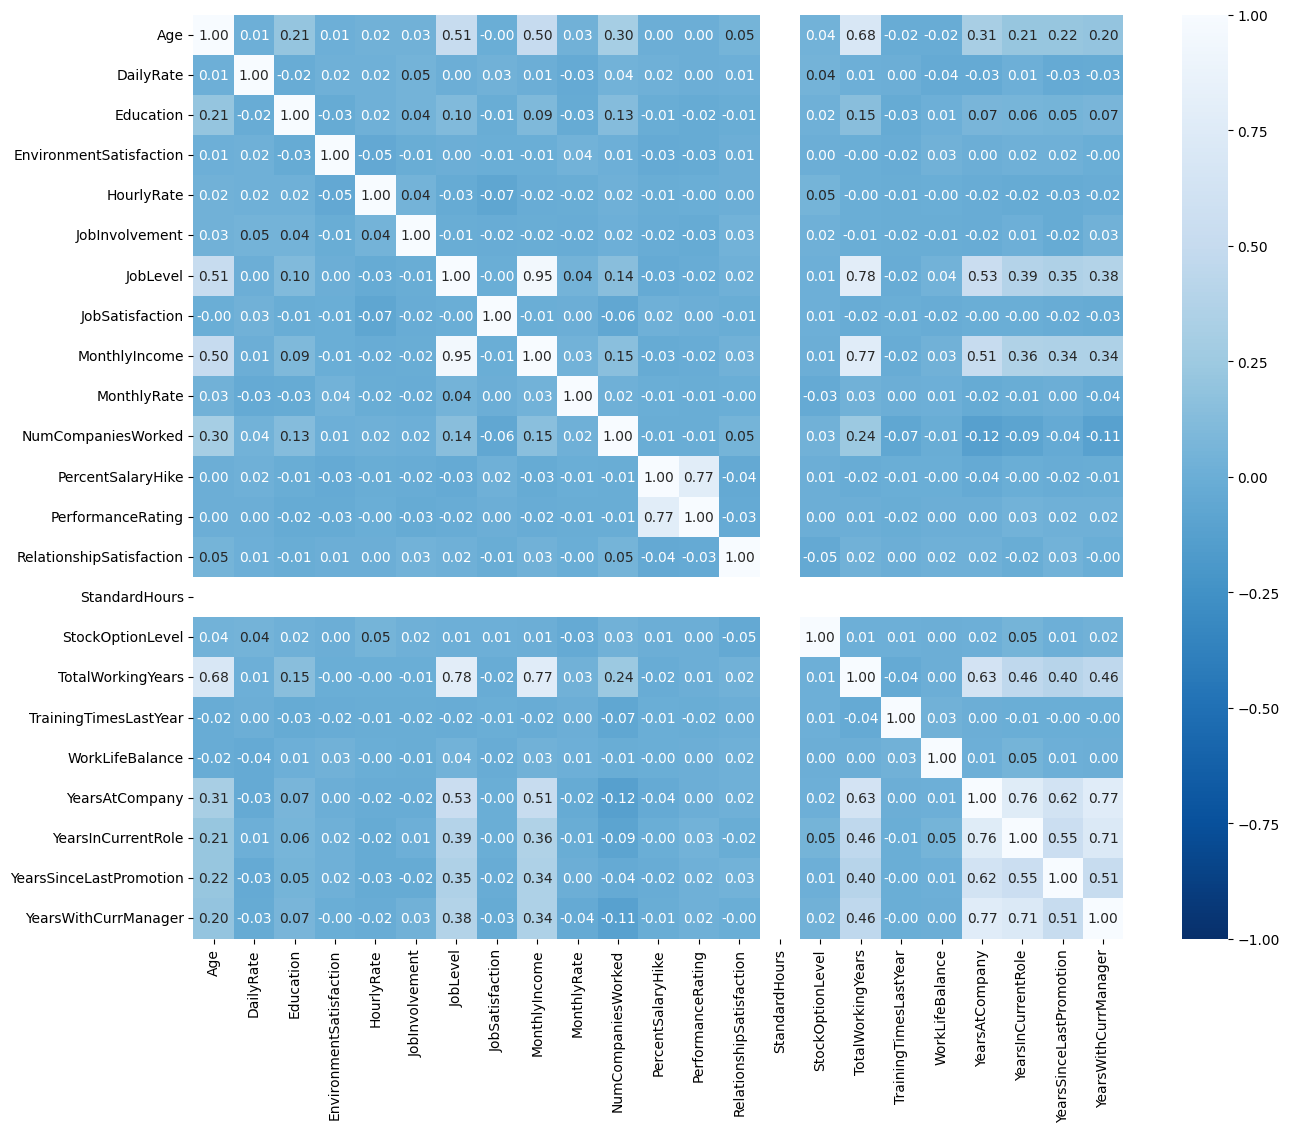

In [186]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,fmt=".2f",vmin=-1,vmax=1,cmap=plt.cm.Blues_r)
plt.show()

IF WE HAVE AN INDEPENDANT FEATURE THAT IS HIGHLY CORELLATED WITH THE DEPENDANT FEATURE WE NEED NOT REMOVE IT.

BUT, IF WE HAVE 2 OR MORE HIGHT CORELATED INDEPENDANT FEATURES WE CAN USE ONLY ONE OF THE FEATURE BY DROPPING THE OTHER HIGHLY CORELATED FEATURES.  

COLLECTING THE FEATURES THAT HAVE MORE THAN 85 % CORR

In [187]:
# THE FOLLOWING FUNCTION WE CAN DROP THE HIGHLY CORELATED FEATURES
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      # if abs(corr_matrix.iloc[i,j]) > threshold:  # this will remove the highly correlated feature including +ve and -ve
      if abs(corr_matrix.iloc[i,j]) > threshold:    # this will only remove the highly +ve correlated features
        colname = corr_matrix.column[i]   # gets the column name
        col_corr.add(colname)
    return col_corr

In [188]:
corr_features = correlation(df,0.85)
corr_features

<ipython-input-187-cfd877b81583>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


set()

### <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< DECISION TREE >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [189]:
y = df.iloc[:,11]
# the independant features will not include the 14th column
x = df.iloc[:,list(range(11)) + list(range(12,len(df.columns)))]

CREATING A COMPLETE PIPELINE FOR DECISION TREE

In [190]:
catagorical_processor = Pipeline(
    steps = [("one hot",OneHotEncoder(handle_unknown="ignore"))]
)
numeric_processor = Pipeline(
    steps = [("scaler",StandardScaler())]
)

In [191]:
preprocessing = ColumnTransformer(
    transformers=[
        ("numeric", numeric_processor, x.select_dtypes(exclude='object').columns),
        ("categorical", catagorical_processor, x.select_dtypes(include='object').columns)
    ]
)

pipe = make_pipeline(preprocessing,DecisionTreeClassifier())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'Relationsh...
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [192]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 20,random_state=42)

In [193]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'Relationsh...
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [194]:
pred = pipe.predict(x_test)

In [195]:
temp = pd.DataFrame({"actual_values":y_test,
                      "predicted_values":pred
                     })
temp

,actual_values,predicted_values
1041,Sales Executive,Sales Executive
184,Manufacturing Director,Healthcare Representative
1222,Human Resources,Human Resources
67,Research Scientist,Manufacturing Director
220,Laboratory Technician,Research Scientist
494,Sales Representative,Sales Representative
430,Laboratory Technician,Laboratory Technician
240,Laboratory Technician,Laboratory Technician
218,Sales Executive,Sales Executive
49,Laboratory Technician,Laboratory Technician


In [196]:
confusion_matrix(y_test,pred)

array([[1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [197]:
print(classification_report(y_test,pred))

                           precision    recall  f1-score   support

Healthcare Representative       0.50      0.50      0.50         2
          Human Resources       1.00      1.00      1.00         1
    Laboratory Technician       1.00      0.50      0.67         6
                  Manager       0.00      0.00      0.00         1
   Manufacturing Director       0.00      0.00      0.00         1
        Research Director       0.00      0.00      0.00         1
       Research Scientist       0.40      0.67      0.50         3
          Sales Executive       1.00      1.00      1.00         3
     Sales Representative       1.00      1.00      1.00         2

                 accuracy                           0.60        20
                macro avg       0.54      0.52      0.52        20
             weighted avg       0.71      0.60      0.62        20



### <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< RANDOM FOREST >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

CREATING A COMPLETE PIPELIINE FOR RANDOMFOREST

In [198]:
pipe2 = make_pipeline(preprocessing,RandomForestClassifier(n_estimators=20))
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'Relationsh...
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=20))])

In [199]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'Relationsh...
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=20))])

In [200]:
pred = pipe2.predict(x_test)

In [201]:
temp = pd.DataFrame({"actual_values":y_test,
                      "predicted_values":pred
                     })
temp

,actual_values,predicted_values
1041,Sales Executive,Sales Executive
184,Manufacturing Director,Manufacturing Director
1222,Human Resources,Human Resources
67,Research Scientist,Healthcare Representative
220,Laboratory Technician,Laboratory Technician
494,Sales Representative,Sales Representative
430,Laboratory Technician,Research Scientist
240,Laboratory Technician,Research Scientist
218,Sales Executive,Sales Executive
49,Laboratory Technician,Laboratory Technician


In [202]:
confusion_matrix(y_test,pred)

array([[1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 4, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [203]:
print(classification_report(y_test,pred))

                           precision    recall  f1-score   support

Healthcare Representative       0.33      0.50      0.40         2
          Human Resources       1.00      1.00      1.00         1
    Laboratory Technician       0.67      0.33      0.44         6
                  Manager       0.00      0.00      0.00         1
   Manufacturing Director       1.00      1.00      1.00         1
        Research Director       1.00      1.00      1.00         1
       Research Scientist       0.17      0.33      0.22         3
          Sales Executive       1.00      1.00      1.00         3
     Sales Representative       1.00      1.00      1.00         2

                 accuracy                           0.60        20
                macro avg       0.69      0.69      0.67        20
             weighted avg       0.66      0.60      0.61        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< LOGISTIC REGRESSION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [215]:
y1 = df.iloc[:,7]
x1 = df.iloc[:,list(range(7)) + list(range(8,len(df.columns)))]

In [216]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 20,random_state=42)

CREATING A COMPLETE PIPE LINE FOR LOGISTIC REGRESSION

In [228]:
preprocessing = ColumnTransformer(
    transformers=[
        ("numeric", numeric_processor, x1.select_dtypes(exclude='object').columns),
        ("categorical", catagorical_processor, x1.select_dtypes(include='object').columns)
    ]
)

pipe1 = make_pipeline(preprocessing,LogisticRegression())
pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'Relationsh...
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [229]:
pipe1.fit(x1_train,y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'Relationsh...
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [230]:
pred = pipe1.predict(x1_test)

In [225]:
temp = pd.DataFrame({"actual_values":y1_test,
                      "predicted_values":pred
                     })
temp

,actual_values,predicted_values
1041,Male,Male
184,Female,Male
1222,Male,Male
67,Male,Male
220,Male,Male
494,Female,Male
430,Male,Male
240,Female,Male
218,Female,Male
49,Male,Male


In [227]:
print(classification_report(y_test,pred))

                           precision    recall  f1-score   support

                   Female       0.00      0.00      0.00       0.0
Healthcare Representative       0.00      0.00      0.00       2.0
          Human Resources       0.00      0.00      0.00       1.0
    Laboratory Technician       0.00      0.00      0.00       6.0
                     Male       0.00      0.00      0.00       0.0
                  Manager       0.00      0.00      0.00       1.0
   Manufacturing Director       0.00      0.00      0.00       1.0
        Research Director       0.00      0.00      0.00       1.0
       Research Scientist       0.00      0.00      0.00       3.0
          Sales Executive       0.00      0.00      0.00       3.0
     Sales Representative       0.00      0.00      0.00       2.0

                 accuracy                           0.00      20.0
                macro avg       0.00      0.00      0.00      20.0
             weighted avg       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.